# Small World Networks
##### Gabriel Lima Barros - 2020006531
##### Gabriel Teixeira Carvalho - 2020006558
##### Thiago Pádua de Carvalho - 2020007066

### Introdução
Nesta atividade será desenvolvido um modelo de redes de mundo pequeno, as quais são redes que possuem uma alta densidade de conexões entre os nós, e um baixo caminho médio entre eles. São redes sociais, econômicas ou de outros tipos, em que a maioria dos nós (indivíduos ou entidades) estão interconectados através de um número relativamente pequeno de ligações. Representaremos aqui um small world network através de um grafo, em que os nós são os indivíduos e as arestas são as conexões entre eles.

In [6]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def shortcuts_num(p, N, Z):
    return int(p * N * Z/2)

In [8]:
def build_small_world_network(N, Z, p):
    G = nx.Graph()
    for i in range(N):
        for j in range(i+1, i + int(Z/2) + 1):
            G.add_edge(i, j % N)
    
    atalhos = shortcuts_num(p, N, Z)
    
    for i in range(atalhos):
        n1, n2 = np.random.choice(N, size=2, replace=False)
        G.add_edge(n1, n2)
    
    return G

In [9]:
# def build_small_world_network(N, Z, p):
#     """Builds a small world network with N nodes, Z nearest neighbors, and rewiring probability p."""
#     G = nx.newman_watts_strogatz_graph(N, Z, p)
#     return G

In [10]:
def FindPathLengthsFromNode(graph, node):
    """Finds the path lengths from a given node to all other nodes in a graph."""
    path_length = nx.single_source_shortest_path_length(graph, node)
    return path_length

In [11]:
def FindAllPathLengths(graph):
    """Finds the path lengths from all nodes to all other nodes in a graph."""
    path_lengths = {}
    for node in graph.nodes():
        path_lengths[node] = FindPathLengthsFromNode(graph, node)
    return path_lengths

In [12]:
def FindAveragePathLengths(graph):
    """Finds the average path length of a graph."""
    path_lengths = FindAllPathLengths(graph)
    total = 0
    for node in path_lengths:
        for path in path_lengths[node]:
            total += path_lengths[node][path]
    return total / (graph.number_of_nodes() * (graph.number_of_nodes() - 1))

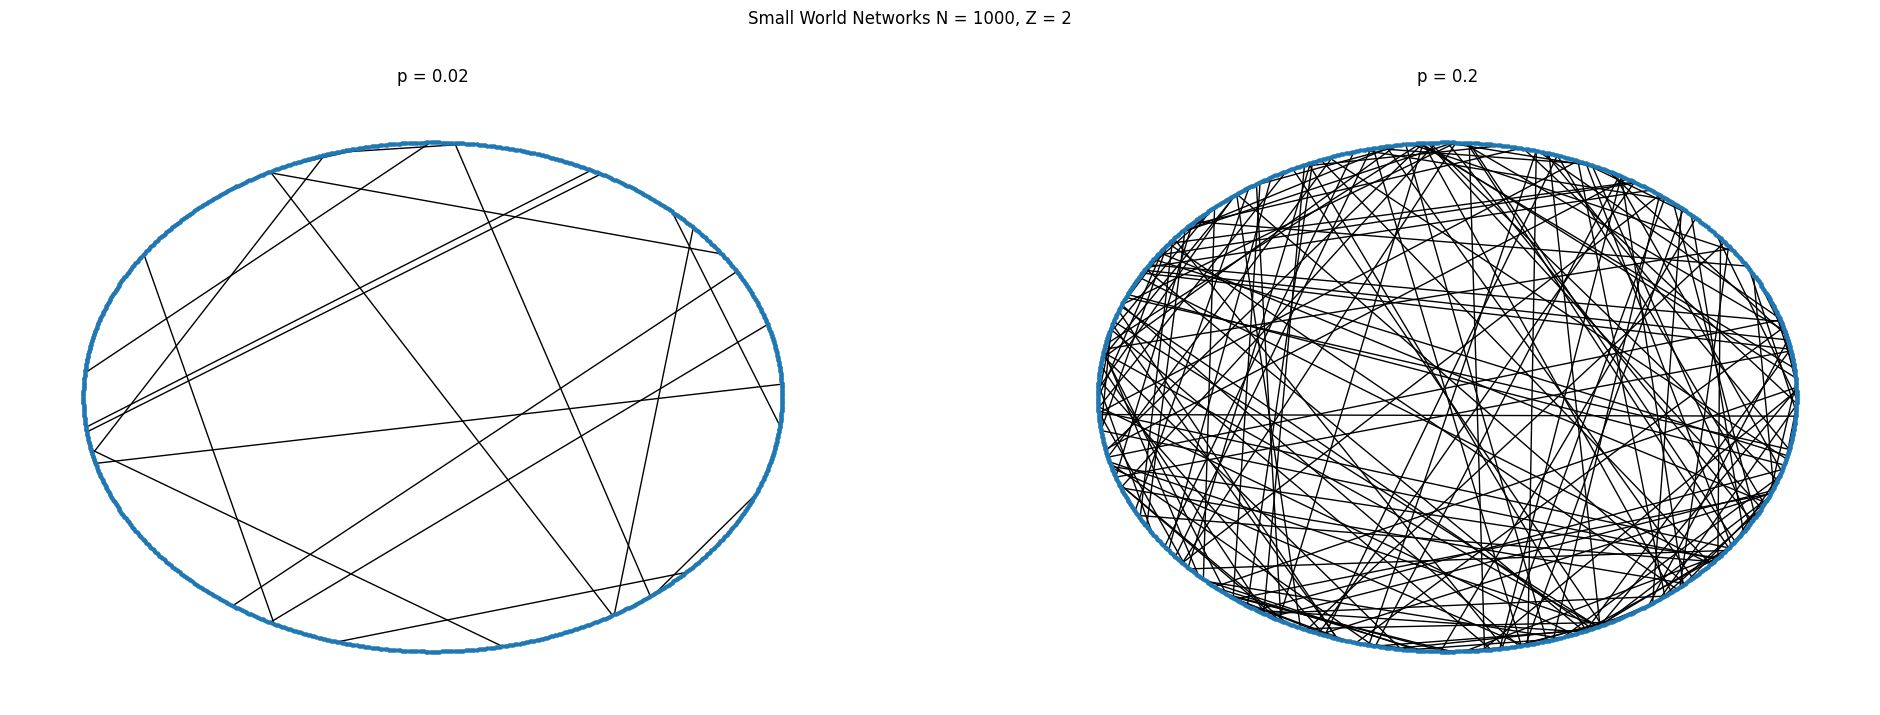

In [13]:
graph = build_small_world_network(1000, 2, 0.02)
graph2 = build_small_world_network(1000, 2, 0.2)

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

nx.draw_circular(graph, node_size=5, ax = axes[0])
nx.draw_circular(graph2, node_size=5, ax = axes[1])

axes[0].set_title("p = 0.02")
axes[1].set_title("p = 0.2")

plt.suptitle("Small World Networks N = 1000, Z = 2")
plt.show()

In [14]:
lengths = FindAllPathLengths(graph)
lengths2 = FindAllPathLengths(graph2)

#plot histogram of path lengths


In [15]:
for i in range(0,100):
    graph = build_small_world_network(100, 2, 0.1)
    values = []
    values.append(FindAveragePathLengths(graph))
print(np.mean(values))

8.836565656565657


In [18]:
# Parte c
p = np.logspace(-3, 3, 100)
mean_path_lengths = []
grapho_p0 = build_small_world_network(50, 2, 0)
d_p0 = FindAllPathLengths(grapho_p0)
d_p0_mean = np.mean(FindAveragePathLengths(grapho_p0))
for i in p:
    graph = build_small_world_network(50, 2, i)
    mean_path_lengths.append(np.mean(FindAveragePathLengths(graph)/d_p0_mean))

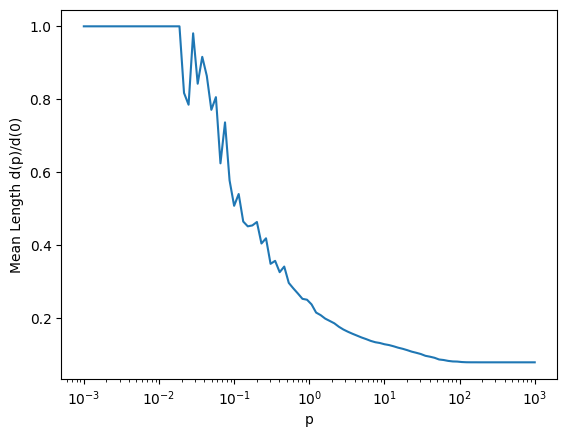

In [21]:
plt.semilogx(p, mean_path_lengths)
plt.ylabel('Mean Length d(p)/d(0)')
plt.xlabel('p')
plt.show()

### Por que o gráfico é fixado em 1 para p pequeno?
O gráfico é fixado em 1 para p pequeno pois, o caminho médio é muito próximo do caminho médio de um grafo regular. Com a probabilidade baixa de rewire, a rede se mantém muito próxima de um grafo regular, e portanto o caminho médio se mantém próximo de 1.

In [ ]:
graphd = build_small_world_network(50, 2, 0.1)
wat_str_01 = nx.watts_strogatz_graph(1000, 10, 0.1)
wat_str_0001 = nx.watts_strogatz_graph(1000, 10, 0.001)

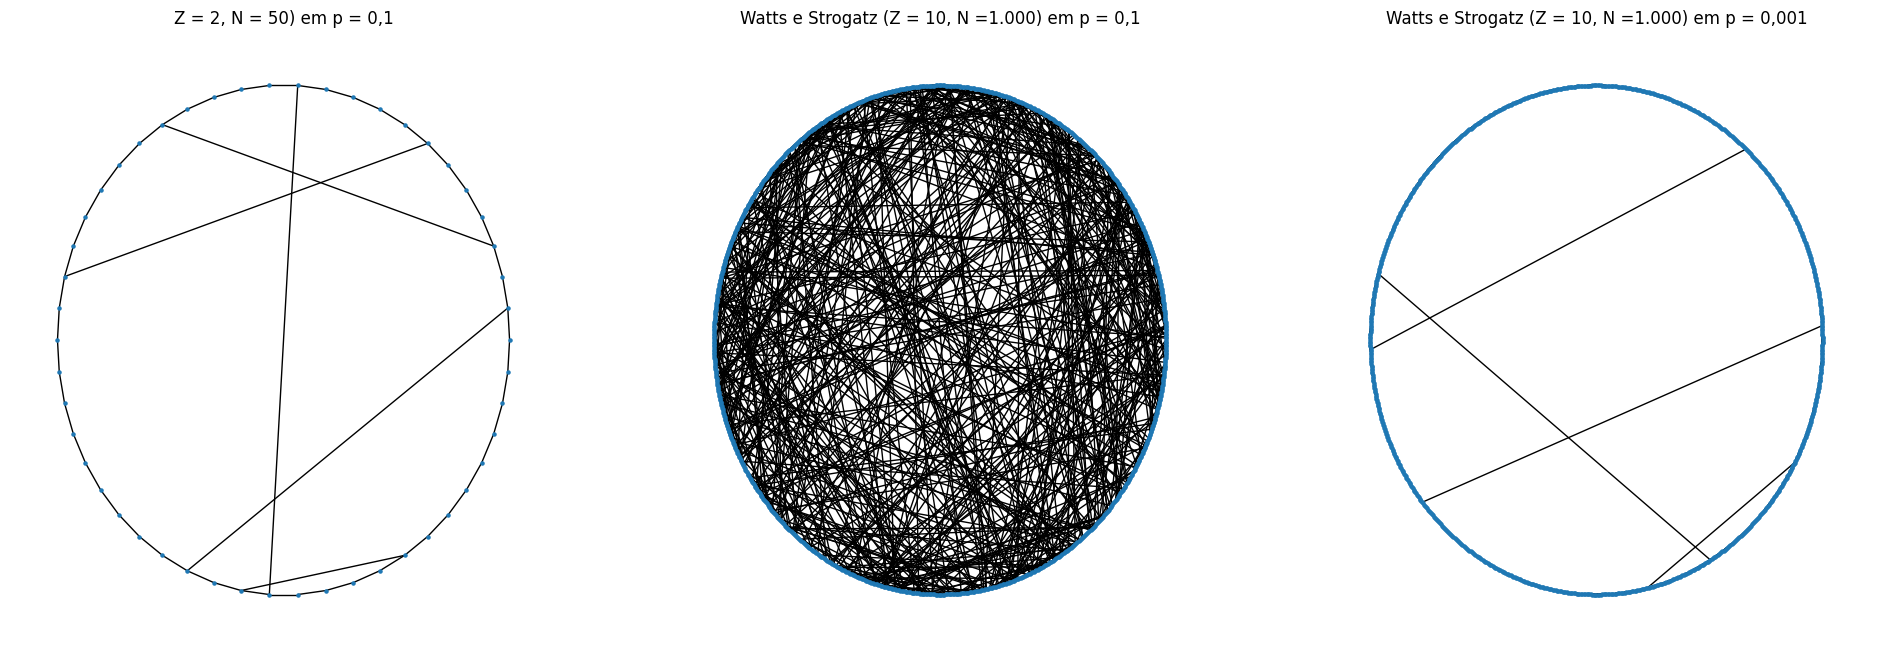

In [ ]:
# Plotagem dos gráficos
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

nx.draw_circular(graphd, node_size=5, ax = axes[0])
nx.draw_circular(wat_str_01, node_size=5, ax = axes[1])
nx.draw_circular(wat_str_0001, node_size=5, ax = axes[2])

axes[0].set_title('(Z = 2, N = 50) em p = 0,1')
axes[1].set_title('Watts e Strogatz (Z = 10, N =1.000) em p = 0,1')
axes[2].set_title('Watts e Strogatz (Z = 10, N =1.000) em p = 0,001')

plt.show()

O primeiro e o terceiro sistemas são estatisticamente semelhantes.

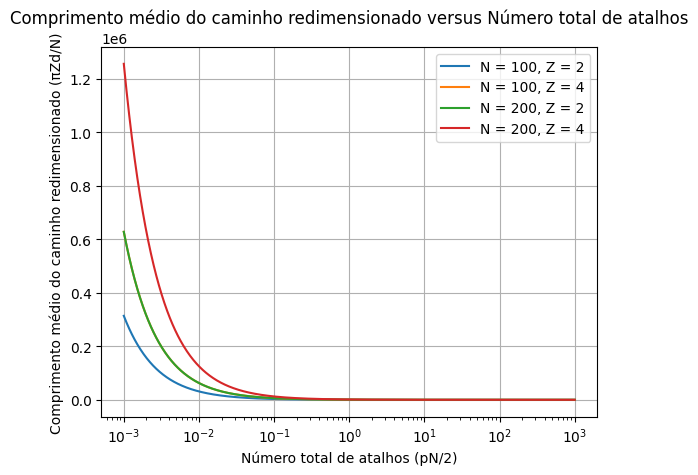

In [24]:
N_values = [100, 200]  
Z_values = [2, 4] 
p = np.logspace(-3, 3, 1000)

for N in N_values:
    for Z in Z_values:
        # Cálculo do comprimento médio do caminho redimensionado
        L = np.pi * Z * N / 2 / p

        plt.plot(p, L, label=f'N = {N}, Z = {Z}')

plt.xscale('log')
plt.xlabel('Número total de atalhos (pN/2)')
plt.ylabel('Comprimento médio do caminho redimensionado (πZd/N)')
plt.title('Comprimento médio do caminho redimensionado versus Número total de atalhos')
plt.legend()
plt.grid(True)
plt.show()